## Importação da libs

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense

### Carregamento dos dados

In [2]:
df = pd.read_csv('C:\\Users\\Guilherme\\Downloads\\listings.csv')

### Uma primeira olhada nos dados

In [3]:
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17878,https://www.airbnb.com/rooms/17878,20211224070558,2021-12-25,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",Discounts for long term stays. <br />- Large b...,This is the one of the bests spots in Rio. Bec...,https://a0.muscache.com/pictures/65320518/3069...,68997,https://www.airbnb.com/users/show/68997,...,4.90,4.76,4.66,NaN,f,1,1,0,0,1.92
1,24480,https://www.airbnb.com/rooms/24480,20211224070558,2021-12-25,"Nice and cozy near Ipanema Beach, w/ home office","My studio is located in the best of Ipanema, t...","The beach, the lagoon, Ipanema is a great loca...",https://a0.muscache.com/pictures/11955612/b28e...,99249,https://www.airbnb.com/users/show/99249,...,4.90,4.97,4.58,NaN,f,1,1,0,0,0.62
2,25026,https://www.airbnb.com/rooms/25026,20211224070558,2021-12-25,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves ...",Copacabana is a lively neighborhood and the ap...,https://a0.muscache.com/pictures/3003965/68ebb...,102840,https://www.airbnb.com/users/show/102840,...,4.90,4.81,4.56,NaN,f,1,1,0,0,1.69
3,35636,https://www.airbnb.com/rooms/35636,20211224070558,2021-12-26,Cosy flat close to Ipanema beach,This cosy apartment is just a few steps away ...,The apartment street is very quiet and safe ....,https://a0.muscache.com/pictures/20009355/38b6...,153232,https://www.airbnb.com/users/show/153232,...,4.88,4.90,4.65,NaN,f,1,1,0,0,1.82
4,35764,https://www.airbnb.com/rooms/35764,20211224070558,2021-12-25,COPACABANA SEA BREEZE - RIO - 20 X Superhost,Our newly renovated studio is located in the b...,Our guests will experience living with a local...,https://a0.muscache.com/pictures/23782972/1d3e...,153691,https://www.airbnb.com/users/show/153691,...,4.94,4.94,4.87,NaN,f,1,1,0,0,2.76


### São 24555 linhas e 74 colunas ou features.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24549 entries, 0 to 24548
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            24549 non-null  int64  
 1   listing_url                                   24549 non-null  object 
 2   scrape_id                                     24549 non-null  int64  
 3   last_scraped                                  24549 non-null  object 
 4   name                                          24528 non-null  object 
 5   description                                   23336 non-null  object 
 6   neighborhood_overview                         13212 non-null  object 
 7   picture_url                                   24549 non-null  object 
 8   host_id                                       24549 non-null  int64  
 9   host_url                                      24549 non-null 

### É possível notar que as variável se dividem em: pertinentes ao dono do imóvel (host), pertinentes ao imóvel e pertinentes ao ato de locação (disponibilidade, preço etc)

## Agora vamos analisar a variável alvo "room_type" que será o nosso y (y = f(x)) 

In [5]:
Y = df['room_type']
Y.value_counts()

Entire home/apt    18564
Private room        5415
Shared room          494
Hotel room            76
Name: room_type, dtype: int64

### É possível notar que a variável alvo é do tipo categórica (problema de classificação múltipla) e que são 4 os possíveis valores de y (classes). É possível notar que as classes estão consideravelmente desbalanceadas, fazendo com que a métrica acurácia perca o significado se usarmos os dados como estão.

### Das 74 features disponíves, vamos selecionar as variáveis que forem mais próximas do domínio da variável. Como a variável alvo é sobre o imóvel, vamos selecionar features que são pertinentes ao imóvel.

### Vamos também remover amostras que possuam algum valor faltante das features selecionadas

In [6]:
#data_1 = df.loc[df['room_type'] == 'Entire home/apt'].sample( int( (len(df.loc[df['room_type'] == 'Entire home/apt']) ) ))
#data_2 = df.loc[df['room_type'] == 'Private room'].sample( int( (len(df.loc[df['room_type'] == 'Private room']) )   ))
#data_3 = df.loc[df['room_type'] == 'Shared room'].sample( int( (len(df.loc[df['room_type'] == 'Shared room']) )  ))
#data_4 = df.loc[df['room_type'] == 'Hotel room'].sample( int( (len(df.loc[df['room_type'] == 'Hotel room']) )   ))
#frames = [data_1, data_2,data_3,data_4]
#df = pd.concat(frames)
df = [df["description"],df["host_listings_count"], df["host_total_listings_count"],df["host_verifications"]
,df["host_identity_verified"],df["neighbourhood_cleansed"],df["property_type"],df['accommodates'],df['bathrooms_text'],
df['bedrooms'],df['beds'],df['price'],df['minimum_nights'],df['maximum_nights'],df['availability_365'],df['room_type'] ]

headers = ["description","host_listings_count", "host_total_listings_count","host_verifications"
,"host_identity_verified","neighbourhood_cleansed","property_type",'accommodates','bathrooms_text',
'bedrooms','beds','price','minimum_nights','maximum_nights','availability_365','room_type']

df = pd.concat(df, axis=1, keys=headers)
df = df.dropna()
Y = df['room_type']

### Selecionando 16 variáveis, sendo a maioria pertinentes ao imóvel e algumas poucas relacionadas ao dono do imóvel (host). Vamos agora focar na variável alvo após o balanceamento das classes

In [7]:
Y.describe()

count               21694
unique                  4
top       Entire home/apt
freq                16336
Name: room_type, dtype: object

### É possível notar que "Entire home/apt" ainda é a mais frequente, o que é bom, por que queremos manter parte da distribuição natural dos dados

In [8]:
Y.value_counts()

Entire home/apt    16336
Private room        4870
Shared room          433
Hotel room            55
Name: room_type, dtype: int64

### Com as classes mais balanceadas vamos transformar as categorias em valores númericos para fazer a classificação

In [9]:
Y = Y.astype('category')
Y = Y.cat.codes
Y = Y.astype( int, errors='raise')

### Vamos aprofundar a análise das variáveis pré-selecionadas. Primeiro com as variáveis numéricas

In [10]:
df.describe()

,host_listings_count,host_total_listings_count,accommodates,bedrooms,beds,minimum_nights,maximum_nights,availability_365
count,21694.000000,21694.000000,21694.000000,21694.000000,21694.000000,21694.000000,21694.000000,21694.000000
mean,8.469853,8.469853,4.267539,1.723564,2.691435,5.051904,600.180649,220.029686
std,31.723076,31.723076,2.498192,1.117476,2.318848,20.479595,633.730006,133.650278
min,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,31.000000,87.000000
50%,1.000000,1.000000,4.000000,1.000000,2.000000,3.000000,365.000000,261.000000
75%,3.000000,3.000000,6.000000,2.000000,3.000000,4.000000,1125.000000,355.000000
max,666.000000,666.000000,16.000000,47.000000,91.000000,1000.000000,47036.000000,365.000000


### Agora com as variáveis de outros tipos como texto

In [11]:
df.describe(exclude=[np.number])

,description,host_verifications,host_identity_verified,neighbourhood_cleansed,property_type,bathrooms_text,price,room_type
count,21694,21694,21694,21694,21694,21694,21694,21694
unique,21109,365,2,152,78,52,2349,4
top,Relaxe com toda a família nesta acomodação tra...,"['email', 'phone']",t,Copacabana,Entire rental unit,1 bath,$500.00,Entire home/apt
freq,23,3809,15027,6220,12603,8367,434,16336


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21694 entries, 0 to 24548
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   description                21694 non-null  object 
 1   host_listings_count        21694 non-null  float64
 2   host_total_listings_count  21694 non-null  float64
 3   host_verifications         21694 non-null  object 
 4   host_identity_verified     21694 non-null  object 
 5   neighbourhood_cleansed     21694 non-null  object 
 6   property_type              21694 non-null  object 
 7   accommodates               21694 non-null  int64  
 8   bathrooms_text             21694 non-null  object 
 9   bedrooms                   21694 non-null  float64
 10  beds                       21694 non-null  float64
 11  price                      21694 non-null  object 
 12  minimum_nights             21694 non-null  int64  
 13  maximum_nights             21694 non-null  int

### É possível notar que muitos variáveis estão como tipo (object) e para fazer a modelagem precisamos transformar-las em numéricas.

### Vamos remover a variável de texto que para tratar daria um pouco mais de trabalho, "description", essa variável pode ser inclusa nessa modelagem caso o texto seja tokenizado e vectorizado utilizando algum embedding (word2Vec, Glove etc). Vamos remover também a variável alvo que já se encontra em seu próprio dataframe chamado Y

In [13]:
X = df.drop('room_type', axis=1).copy()
X = X.drop('description', axis=1).copy()

### A variável host_verifications, vamos pegar o número de verificações que aquele host possuí, ex: ['email', 'phone', 'reviews', 'jumio', 'offline_government_id', 'selfie', 'government_id'] será colocado o valor 7.

### A variável "price" ex: [\$4,106]será removido o cifrão e a vírgula separadora de casas decimais e convertida para um float

### A variável "bathroom_text" ex: [1.5 baths] será considerado o primeiro elemento depois de um split de spaço e convertida para um float

### A variável "host_identity_verified" ex [t] ou [f] será substituída para 1 ou 0 respectivamente

In [14]:
from tqdm import tqdm 
for index, row in tqdm(X.iterrows()):
    #print(len(row['host_verifications'].split()))
    #print(row['bathrooms_text'][0])
    X.at[index,'host_verifications'] = int(len(row['host_verifications'].split()))
    X.at[index,'price'] = float(row['price'][1:].replace(",",""))
    try:
        X.at[index,'bathrooms_text'] = float(row['bathrooms_text'][0])
    except ValueError:
        X.at[index,'bathrooms_text'] = 1
        
    if row['host_identity_verified'] == 't': 
        X.at[index,'host_identity_verified'] = 1
    else:
        X.at[index,'host_identity_verified'] = 0


21694it [00:01, 18585.37it/s]


### As variáveis 'neighbourhood_cleansed' ex: [Copacabana]  e 'property_type' ex: [Entire condominium (condo)] que são categóricas podem ser subsituídas por um inteiro que representa aquela classe

In [15]:
X['neighbourhood_cleansed'] = X['neighbourhood_cleansed'].astype('category')
X['neighbourhood_cleansed'] = X['neighbourhood_cleansed'].cat.codes

X['property_type'] = X['property_type'].astype('category')
X['property_type'] = X['property_type'].cat.codes

### Feita essas correções e limpeza de dados, podemos mudar o tipo das colunas de object para numérico

In [16]:
X = X.astype({"host_verifications": int}, errors='raise')
X = X.astype({"host_identity_verified": int}, errors='raise')
X = X.astype({"neighbourhood_cleansed": int}, errors='raise')
X = X.astype({"property_type": int}, errors='raise') 
X = X.astype({"bathrooms_text": float}, errors='raise')
X = X.astype({"price": float}, errors='raise') 
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21694 entries, 0 to 24548
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   host_listings_count        21694 non-null  float64
 1   host_total_listings_count  21694 non-null  float64
 2   host_verifications         21694 non-null  int32  
 3   host_identity_verified     21694 non-null  int32  
 4   neighbourhood_cleansed     21694 non-null  int32  
 5   property_type              21694 non-null  int32  
 6   accommodates               21694 non-null  int64  
 7   bathrooms_text             21694 non-null  float64
 8   bedrooms                   21694 non-null  float64
 9   beds                       21694 non-null  float64
 10  price                      21694 non-null  float64
 11  minimum_nights             21694 non-null  int64  
 12  maximum_nights             21694 non-null  int64  
 13  availability_365           21694 non-null  int

### Podemos analisar agora os dados, do dataset limpo e corrigido

In [17]:
X

,host_listings_count,host_total_listings_count,host_verifications,host_identity_verified,neighbourhood_cleansed,property_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,availability_365
0,2.0,2.0,7,1,34,9,5,1.0,2.0,2.0,350.0,5,180,257
1,0.0,0.0,5,1,64,15,2,1.0,1.0,1.0,296.0,3,90,107
2,3.0,3.0,7,1,34,15,3,1.0,1.0,1.0,387.0,3,90,206
3,1.0,1.0,7,1,64,15,2,1.0,1.0,1.0,172.0,2,89,207
4,1.0,1.0,4,1,34,13,2,1.0,1.0,1.0,260.0,3,15,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24544,0.0,0.0,8,1,34,15,10,3.0,4.0,8.0,1786.0,4,365,365
24545,1.0,1.0,7,1,46,15,4,1.0,1.0,2.0,460.0,2,365,3
24546,1.0,1.0,5,1,78,15,8,2.0,3.0,4.0,891.0,2,365,267
24547,9.0,9.0,7,1,34,15,6,1.0,1.0,8.0,177.0,4,90,81


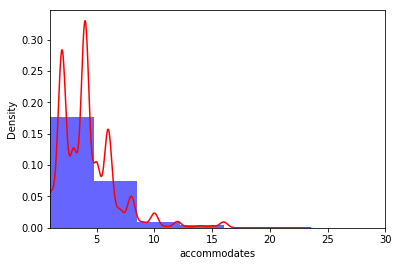

In [18]:
ax = df["accommodates"].hist(bins=4, density=True, stacked=True, color='blue', alpha=0.6)
df["accommodates"].plot(kind='density', color='red')
ax.set(xlabel='accommodates')
plt.xlim(1,30)
plt.show()

### É possível perceber que a maioria dos valores de quantas pessoas aquele imóvel acomoda "accomodate" está entre 1 e 10 pessoas.

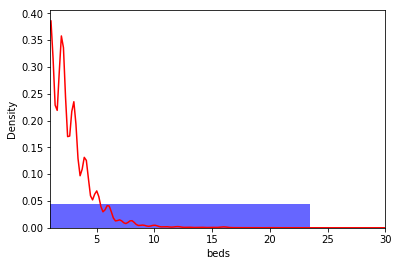

In [19]:
ax = df["beds"].hist(bins=4, density=True, stacked=True, color='blue', alpha=0.6)
df["beds"].plot(kind='density', color='red')
ax.set(xlabel='beds')
plt.xlim(1,30)
plt.show()

### Como era de se esperar, o número de camas segue a mesma tendência

### Antes de começar o treinamento, é importante lembrar que as classes estão desbalanceadas. A categoria hotel_room conta com apenas 56 amostras. Utilizando o algoritmo SMOTE (Synthetic Minority Over-sampling Technique) é possível gerar amostras artificiais das classes com menos amostras. Referência -> https://arxiv.org/pdf/1106.1813.pdf

In [20]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X, Y = sm.fit_resample(X, Y)

### Vamos dividir os dataframes das variáveis independentes (X) e da alvo (Y)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)

### Para saber das features selecionados quais são mais relevantes, é possível se fazer um "weak learner" como uma random forest ou decision forest para saber quais atributos conseguem melhor separar os dados. Utilizando o cálculo de importância. Mais em: https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

In [22]:
from sklearn.ensemble import RandomForestClassifier
feature_names = [f"feature {i}" for i in (X.columns)]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

### Vamos agora, plotar os decrécimos de impuridade (MDI) ou GINI para essas features.
### Uma excelente explicação sobre MDI >https://blog.methodsconsultants.com/posts/be-aware-of-bias-in-rf-variable-importance-metrics/

Text(0,0.5,'Decrécimo da média de impuridade')

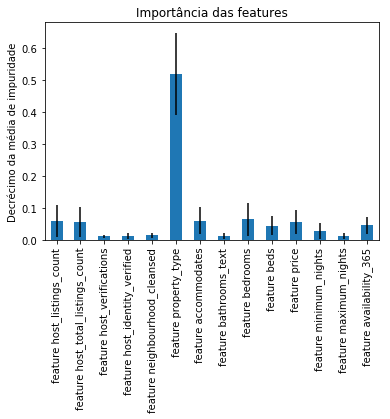

In [23]:
import pandas as pd

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Importância das features")
ax.set_ylabel("Decrécimo da média de impuridade")

### É notório que as variáveis relacionadas ao imóvel (principalmente "property_type") são extremamentes relevantes para separação dos dados. As variáveis relacionadas ao propretário possuem um menor grau de relevância nessa modelagem

### Vamos criar o classificador, usando uma rede neural do keras

In [24]:
def create_model():
    model = Sequential()
    model.add(Dense(14, input_dim=14, activation='softmax',kernel_initializer='lecun_normal'))
    model.add(Dense(28, activation='softmax',kernel_initializer='lecun_normal'))
    model.add(Dense(4, activation='softmax',kernel_initializer='lecun_normal'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

### Vamos treinar um modelo em X_train e y_train e testar as predições em X_test para comparar com y_test

In [34]:
import sklearn.metrics as metrics
from scikeras.wrappers import KerasClassifier
model = KerasClassifier(model=create_model, epochs=30, batch_size=10, verbose=0)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
y_pred = y_test.values.tolist()
matrix = metrics.confusion_matrix(predictions, y_pred)

In [35]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix :\n", confusion_matrix(predictions, y_pred))

Confusion Matrix :
 [[3999    0   96   23]
 [   5 3550  385  314]
 [  74  184 3566  291]
 [   1  346   59 3443]]


### Vamos aplicar um cross validation 10 fold, para verificar a média da acurácia em 10 classificações

In [30]:
from sklearn.model_selection import KFold
from scikeras.wrappers import KerasClassifier, KerasRegressor
cross_validation = KerasClassifier(model=create_model, epochs=150, batch_size=30, verbose=0)
kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(cross_validation, X_test, y_test, cv=kfold)
print("Acurácia médias dos 10 folds: %.2f%% " % (results.mean()*100))

Acurácia médias dos 10 folds: 83.06% 


### A modelo proposto atingiu uma média de 85.62% de acurácia na validação cruzada, vamos tirar as outras métricas: precisão,recall e F1

In [36]:
from sklearn.metrics import precision_score
precision = precision_score(predictions, y_pred,average='weighted')
print(f"Precision: {precision}")

Precision: 0.8917540807377721


In [37]:
from sklearn.metrics import recall_score
recall = recall_score(predictions, y_pred,average='weighted')
print(f"Recall: {recall}")

Recall: 0.8911606268364348


In [38]:
print(f"F1 score: {2 * (precision * recall) / (precision + recall)}")

F1 score: 0.8914572550197503
